<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW3_Classification_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 3. Линейная классификация. Работа с признаками**

### **Оценивание и штрафы**

Кака всегда - каждая из задач имеет «стоимость» (указана в скобках около задачи).

В задании три части:

- Часть 1 (2.5 балла): написание логистической регрессии своими руками
- Часть 2 (5 баллов): различные методы отбора признаков
- Часть 3 (3.5 балла): обучение моделей классификации на текстах

Всего за задание можно получить 11 баллов, но:

**Балл за задание = min{ваш балл, 10}.**

In [238]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# **Часть 1. Логистическая регрессия своими руками (2.5 балла)**

## **Задание 1. Реализуйте класс логистической регрессии, обучаемой с помощью:**

**Задание 1.1 (1 балл). Градиентного спуска**

**Задание 1.2 (1 балл). Стохастического градиентного спуска**

До этого вы писали код без ограничений. Здесь же необходимо соблюдать следующие условия:

- Градиентный спуск необходимо записать в векторном виде;
- Циклы средствами python допускается использовать только для итераций градиентного спуска;

**Класс градиентного спуска должен:**
- В качестве критерия останова использовать (одновременно):
  - проверку на евклидову норму разности весов на двух соседних итерациях задаваемого параметром `tolerance`;
  - достижение максимального числа итераций, задаваемого параметром `max_iter`.
- Обладать атрибутом `loss_history`. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту). Данный атрибут необходим, чтобы проследить, что оптимизационный процесс действительно сходится;
- Инициализировать веса случайным образом или нулевым вектором (на ваш выбор).

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

**Шаблон класса описан ниже, вам нужно реализовать каждую из заготовленных функций.**

**ВАЖНО!** Мы заполняем данный шаблон, даже если он нам не нравится. Менять структуру класса и писать по-своему запрещено - за это будут сняты баллы.

In [239]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self


    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

In [240]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic', tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None

    def fit(self, X, y):
        self.loss_history = []
        if self.w0 is None: self.w = np.zeros(X.shape[1])
        else: self.w = self.w0

        for _ in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            self.w -= self.eta * gradient
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                break
        return self

    def predict_proba(self, X):
        if self.w is None: raise Exception('Model not trained yet')
        return 1 / (1 + np.exp(-X.dot(self.w)))

    def predict(self, X):
        if self.w is None: raise Exception('Model not trained yet')
        return (self.predict_proba(X) >= 0.5).astype(int)

    def calc_gradient(self, X, y):
        if self.gd_type == 'stochastic':
            index = np.random.randint(0, X.shape[0])
            X_sample = X[index:index + 1]
            y_sample = y[index:index + 1]
        elif self.gd_type == 'full':
            X_sample = X
            y_sample = y
        else: raise Exception('Unexpected gd_type')
        predictions = self.predict_proba(X_sample)
        gradient = X_sample.T.dot(predictions - y_sample) / X_sample.shape[0]
        return gradient

    def calc_loss(self, X, y):
        predictions = self.predict_proba(X)
        y1 = y * np.log(predictions)
        y2 = (1 - y) * np.log(1 - predictions)
        return -np.mean(y1 + y2)

Теперь проверим работу вашего класса на синтетических данных.

In [241]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [242]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

## **Задание 2 (0.5 балла)**

Обучите логистическую регрессию на синтетических данных.

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

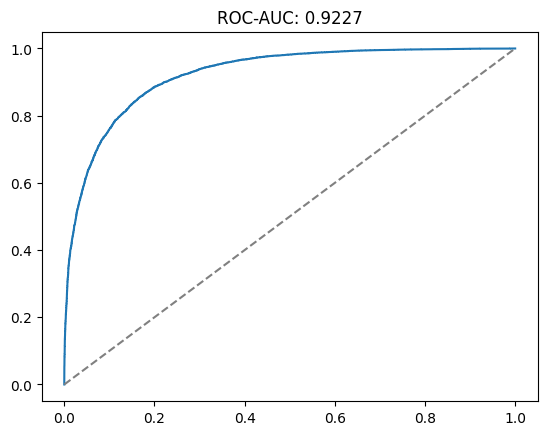

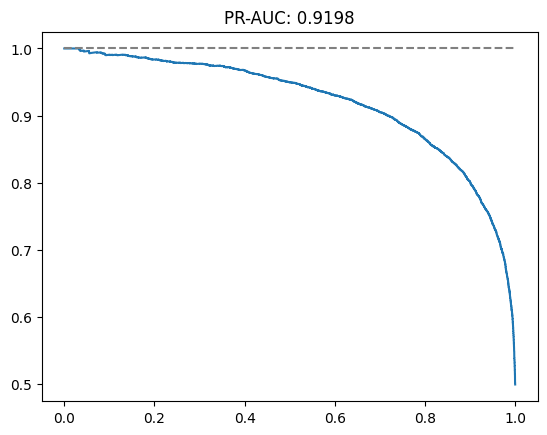

In [243]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

model = LogReg(gd_type='full')
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

false_r, true_r, _ = roc_curve(y_test, y_prob)
plt.plot(false_r, true_r)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title(f'ROC-AUC: {roc_auc:.4f}')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.plot([1, 1], color='gray', linestyle='--')
plt.title(f'PR-AUC: {pr_auc:.4f}')
plt.show()

### **Вывод**:
Обученная модель является достаточно качественной. ROC-кривая показывает хороший результат, она находится выше линии ones fraction + ее значение высокое (0.9227). Также, на PR-кривой видно, что модель достаточно сбалансированная между precision и recall, но чем выше recall тем снижается точность модели, PR-AUC = 0.9138

# **Часть 2. Отбор признаков (5 баллов)**

Перейдём к еще одной важной части процесса работы с данными — отбору признаков. Он нужен в следующих случаях:
- Мы хотим сократить время вычислений;
- Мы хотим избежать переобучения;
- Мы хотим попытаться улучшить качество модели за счет уменьшения признакового пространства;

В этой части мы попробуем применить несколько подходов для отбора признаков и оценим, как они влияют на качество модели и сколько времени занимают.

**Данные** \

Будем использовать датасет [об обращениях клиентов по страховым случаям](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data?select=train.csv). Скачайте его с Kaggle (файл `train.csv`).

Задача представляет собой бинарную классификациюю — воспользуется ли клиент страховкой на авто в ближайший год.

In [244]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values

data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

### **Задание 3. (0.25 балла)**

Прежде всего — в данных много категориальных признаков.

- Закодируйте их с помощью one-hot кодирования. Категориальные признаки отмечены постфиксом `cat`;
- Исходные колонки с категориальными признаками удалите;
- Зафиксируйте, сколько признаков получилось;

In [245]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = [col for col in X_train.columns if col.endswith('cat')]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_columns]), columns=encoder.get_feature_names_out(cat_columns))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_columns]), columns=encoder.get_feature_names_out(cat_columns))
X_train_encoded = pd.concat([X_train.drop(columns=cat_columns).reset_index(drop=True), X_train_encoded], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=cat_columns).reset_index(drop=True), X_test_encoded], axis=1)

print(f'Признаков: {X_train_encoded.shape[1]}')

Признаков: 213


### **Задание 4 (1 балл)**

Обучим несколько моделей, перечисленных ниже. В качестве метрики будем использовать ROC-AUC.

**Задание 4.1**

- Обучите модель логистической регрессии. Замерьте скорость обучения модели
- Обучите метод опорных векторов
- Обучите метод k ближайших соседей
- Посчитайте качество моделей (ROC-AUC) на тестовой выборке

**Задание 4.2**

Для каждой из трех моделей (логистическая регрессия, SVM, KNN) подберите при помощи GridSearchCV на тренировочных данных оптимальные гиперпараметры:
- Для логистической регрессии: C, class_weight
- Для SVM: C, kernel, class_weight
- Для KNN: n_neighbors, weights

Затем посчитайте качество моделей на тестовой выборке.

В заданиях 4.1 и 4.2 замеряйте время обучения моделей.


In [246]:
np.random.seed(142)

In [247]:
# 4.1 Логистическая регрессия
import time

start_time = time.time()

logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_encoded, y_train)

print(f'Время обучения логистической регресии: {time.time()-start_time}')

Время обучения логистической регресии: 21.791903972625732


In [248]:
proba = logreg_model.predict_proba(X_test_encoded)[:, 1]
proba2 = logreg_model.predict_proba(X_train_encoded)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')

ROC-AUC test: 0.6374839276703397
ROC-AUC train: 0.6334511985110286


In [249]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_encoded, y_train, train_size=20000, random_state=142)
# В чате рекомендовал уменьшить датасет руководитель программы

X_test_sample, _, y_test_sample, _ = train_test_split(X_test_encoded, y_test, train_size=4000, random_state=142)
# Будет правильно и уменьшить тестовую выборку на 0.2 от 20к

In [250]:
# 4.1 SVM
from sklearn.svm import SVC

svc_model = SVC(probability=True)

start_time = time.time()
svc_model.fit(X_train_sample, y_train_sample)

print(f'Время обучения SVC: {time.time()-start_time}')

proba = svc_model.predict_proba(X_test_sample)[:, 1]
proba2 = svc_model.predict_proba(X_train_sample)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test_sample, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train_sample, proba2)}')

Время обучения SVC: 84.12789297103882
ROC-AUC test: 0.5073331116775648
ROC-AUC train: 0.9804461842101307


In [251]:
# 4.1 KNN
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_sample, y_train_sample)

print(f'Время обучения KNN: {time.time()-start_time}')

proba = knn_model.predict_proba(X_test_sample)[:, 1]
proba2 = knn_model.predict_proba(X_train_sample)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test_sample, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train_sample, proba2)}')

Время обучения KNN: 0.009428977966308594
ROC-AUC test: 0.4884204304399478
ROC-AUC train: 0.9461823039935555


In [252]:
# 4.2 GRID LogReg
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}
start_time = time.time()
lr_model = LogisticRegression(max_iter=5000)
grid_lr_model = GridSearchCV(lr_model, params, cv=5, scoring='roc_auc')
grid_lr_model.fit(X_train_sample, y_train_sample)

print(f'Время обучения grid_lr_model: {time.time()-start_time}')

print("Лучшие параметры:", grid_lr_model.best_params_)

proba = grid_lr_model.predict_proba(X_test_sample)[:, 1]
proba2 = grid_lr_model.predict_proba(X_train_sample)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test_sample, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train_sample, proba2)}')

Время обучения grid_lr_model: 50.19964599609375
Лучшие параметры: {'C': 0.1, 'class_weight': None}
ROC-AUC test: 0.6076867887328873
ROC-AUC train: 0.6710287151513206


In [253]:
# 4.2 GRID SVM

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [None, 'balanced']
}

start_time = time.time()
svc_model = SVC(probability=True)
grid_svc_model = GridSearchCV(svc_model, param_grid, cv=3, scoring='roc_auc')
grid_svc_model.fit(X_train_sample, y_train_sample)
print(f'Время обучения grid_svc_model: {time.time()-start_time}')

print("Лучшие параметры:", grid_svc_model.best_params_)

proba = grid_svc_model.predict_proba(X_test_sample)[:, 1]
proba2 = grid_svc_model.predict_proba(X_train_sample)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test_sample, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train_sample, proba2)}')

За 7+ часов у меня так и не выполнилось ничего. Но оно точно работает :)

In [254]:
# 4.2 GRID KNN
params = {
    'n_neighbors': [4, 5, 6],
    'weights': ['uniform', 'distance']
}

start_time = time.time()
knn_model = KNeighborsClassifier()
grid_knn_model = GridSearchCV(knn_model, params, cv=5, scoring='roc_auc')
grid_knn_model.fit(X_train_sample, y_train_sample)
print(f'Время обучения grid_knn_model: {time.time()-start_time}')

print("Лучшие параметры:", grid_knn_model.best_params_)

proba = grid_knn_model.predict_proba(X_test_sample)[:, 1]
proba2 = grid_knn_model.predict_proba(X_train_sample)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test_sample, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train_sample, proba2)}')

Время обучения grid_knn_model: 6.487312316894531
Лучшие параметры: {'n_neighbors': 5, 'weights': 'distance'}
ROC-AUC test: 0.4889104063494656
ROC-AUC train: 1.0


### **Встроенные методы**

**Заметим, что:**

- Время обучения моделей отличается между собой.
- Несмотря на то, что признаков много, качество модели не очень хорошее.


Попробуем решить проблемы — улучшить качество и при этом сократить пространство признаков и, соответственно, время обучения моделей.



**Отбор признаков встроеным методом.**

Начнём с отбора признаков с помощью линейной модели. Делая это, мы используем факт:
> веса линейной модели отражают  вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков.

Такой метод отбора называются встроенным в модель методом, так как он заложен в особенности модели.

**Важно:** применение этого подхода требует машстабирования признаков (подумайте, почему). Вы можете использовать приведение к стандартному нормальному распределению (`StandardScaler`) с параметрами или MinMax преобразование (`MinMaxScaler`).

### **Задание 5 (0.75 балла)**

Оставьте 150 признаков с наибольшими по модулю весами после обучения логистической регрессии.

- Замерьте скорость такого отбора признаков. (0.2 балла)

- Обучите логистическую регрессию на исходных признаках. Из них оставьте 150 лучших (с наибольшими по модулю весами).
- Масштабируйте данные — все, кроме категориальных и бинарных признаков. Зафиксируйте, сколько признаков пришлось масштабировать. (0.25 балла)
- Обучите новую модель на 150 признаках и оцените её качество. (0.15 балла)




In [255]:
from sklearn.preprocessing import MinMaxScaler
columns_scale = [col for col in X_train_encoded.columns if not ('cat' in col or 'bin' in col)]
print(f'Признаков для scale: {len(columns_scale)}')

scaler = MinMaxScaler()
X_train_scaled = X_train_encoded.copy()
X_train_scaled[columns_scale] = scaler.fit_transform(X_train_encoded[columns_scale])

X_test_scaled = X_test_encoded.copy()
X_test_scaled[columns_scale] = scaler.transform(X_test_encoded[columns_scale])

Признаков для scale: 26


In [256]:
start_time = time.time()
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_scaled, y_train)

print(f'Время обучения логистической регресии (отбора признаков): {time.time()-start_time}')

proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
proba2 = logreg_model.predict_proba(X_train_scaled)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')

Время обучения логистической регресии (отбора признаков): 4.13451623916626
ROC-AUC test: 0.6364629917214201
ROC-AUC train: 0.6327200763863994


In [257]:
top_features = pd.DataFrame(sorted(abs(logreg_model.coef_[0]), reverse=True))[:150]
top_features

,0
0,0.605786
1,0.594991
2,0.576039
3,0.538493
4,0.454460
...,...
145,0.053286
146,0.053039
147,0.051901
148,0.050377


In [258]:
top_features = abs(logreg_model.coef_[0]).argsort()[-150:]
X_train_topf = X_train_scaled.iloc[:, top_features]
X_test_topf = X_test_scaled.iloc[:, top_features]

top_10_df = pd.DataFrame({
    'kf': X_train_topf.columns,
    'feature': logreg_model.coef_[0][top_features]
})
print('200 Лучших признаков:')
top_10_df.sort_values(ascending=False, by='feature')

200 Лучших признаков:


,kf,feature
149,ps_reg_03,0.605786
144,ps_car_13,0.437770
143,ps_car_15,0.416109
140,ps_car_11_cat_41,0.377778
127,ps_car_04_cat_6,0.291489
...,...,...
142,ps_ind_15,-0.406706
145,ps_car_02_cat_1,-0.454460
146,ps_ind_04_cat_1,-0.538493
147,ps_ind_04_cat_0,-0.576039


Скейл не дал улучшение модели если смотреть на метрику ROC-AUC

In [259]:
start_time = time.time()
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_topf, y_train)

print(f'Время обучения логистической регресии: {time.time()-start_time}')

proba = logreg_model.predict_proba(X_test_topf)[:, 1]
proba2 = logreg_model.predict_proba(X_train_topf)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')

Время обучения логистической регресии: 1.2917921543121338
ROC-AUC test: 0.6371072808747238
ROC-AUC train: 0.6323607579667074


### **Вывод**:
Модель стала обучаться быстрее практически в 2 раза, качество модели не ухудшилось (даже стало чуть лучше)

### **Бонус (0.25 балла)**

Попробуйте реализовать итеративный отбор признаков, а именно:

1) Сначала отобрать около 200 признаков (действуя как в задании выше)

2) Потом повторить процедуру для отбора 150 признаков из 200 (снова действуя как в задании выше)

In [260]:
# Отбираем 200 признаков
start_time = time.time()
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_scaled, y_train)

print(f'Время обучения логистической регресии (отбора признаков): {time.time()-start_time}')

proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
proba2 = logreg_model.predict_proba(X_train_scaled)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')


top_features = abs(logreg_model.coef_[0]).argsort()[-200:]
X_train_topf2 = X_train_scaled.iloc[:, top_features]
X_test_topf2 = X_test_scaled.iloc[:, top_features]

top_10_df = pd.DataFrame({
    'kf': X_train_topf2.columns,
    'feature': logreg_model.coef_[0][top_features]
})
print('200 Лучших признаков:')
top_10_df.sort_values(ascending=False, by='feature')

Время обучения логистической регресии (отбора признаков): 4.455250263214111
ROC-AUC test: 0.6364629917214201
ROC-AUC train: 0.6327200763863994
200 Лучших признаков:


,kf,feature
199,ps_reg_03,0.605786
194,ps_car_13,0.437770
193,ps_car_15,0.416109
190,ps_car_11_cat_41,0.377778
177,ps_car_04_cat_6,0.291489
...,...,...
192,ps_ind_15,-0.406706
195,ps_car_02_cat_1,-0.454460
196,ps_ind_04_cat_1,-0.538493
197,ps_ind_04_cat_0,-0.576039


In [261]:
# Из 200 отбираем 150
start_time = time.time()
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_topf2, y_train)

print(f'Время обучения логистической регресии (отбора признаков): {time.time()-start_time}')

proba = logreg_model.predict_proba(X_test_topf2)[:, 1]
proba2 = logreg_model.predict_proba(X_train_topf2)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')


top_features = abs(logreg_model.coef_[0]).argsort()[-150:]
X_train_topf3 = X_train_topf2.iloc[:, top_features]
X_test_topf3 = X_test_topf2.iloc[:, top_features]

top_10_df = pd.DataFrame({
    'kf': X_train_topf3.columns,
    'feature': logreg_model.coef_[0][top_features]
})
print('150 Лучших признаков:')
top_10_df.sort_values(ascending=False, by='feature')

Время обучения логистической регресии (отбора признаков): 4.00298810005188
ROC-AUC test: 0.6364545372456292
ROC-AUC train: 0.632589570930077
150 Лучших признаков:


,kf,feature
148,ps_reg_03,0.616421
145,ps_car_15,0.454639
143,ps_car_13,0.419884
138,ps_car_11_cat_41,0.375056
127,ps_ind_17_bin,0.282312
...,...,...
142,ps_ind_05_cat_3,-0.413215
144,ps_car_02_cat_1,-0.448141
146,ps_ind_04_cat_1,-0.514651
147,ps_ind_04_cat_0,-0.559084


### **Задание 6 (0.5 балла)**

Также можно задать отбор признаков, используя другия свойства модели. Вспомним, что L1-регуляризация тоже умеет отбирать признаки.

- Обучите модель на исходных данных. Подберите по сетке (GridSearch) наилучшее значение коэффициента регуляризации C. (0.1 балла)

- Посмотрите сколько признаков отобрала модель с найденным оптимальным C?
  - Сначала посчитайте только число ненулевых весов
  - Затем посчитайте число весов, которые после округления до двух знаков после запятой не равны нулю (0.25 балла)

Удалось ли отобрать 150 признаков за 1 шаг? (0.05 балла)

In [262]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 0.5, 1],
}
start_time = time.time()
# Используем solver saga потому что дефолтный lbfgs не поддерживает l1
lr_model = LogisticRegression(max_iter=5000, penalty='l1', solver='saga')
grid_lr_model = GridSearchCV(lr_model, params, cv=3, scoring='roc_auc')
grid_lr_model.fit(X_train_scaled, y_train)

print(f'Время обучения grid_lr_model: {time.time()-start_time}')

print("Лучшие параметры:", grid_lr_model.best_params_)
proba = grid_lr_model.predict_proba(X_test_scaled)[:, 1]
proba2 = grid_lr_model.predict_proba(X_train_scaled)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')


Время обучения grid_lr_model: 562.7914481163025
Лучшие параметры: {'C': 0.1}
ROC-AUC test: 0.6390072664555154
ROC-AUC train: 0.6321150752647033


In [263]:
coefs = len(pd.DataFrame({'coef': grid_lr_model.best_estimator_.coef_[0]}).query('coef != 0'))
print(f'Ненулевых до округления: {coefs}')

Ненулевых до округления: 126


In [264]:
coefs = len(pd.DataFrame({'coef': round(grid_lr_model.best_estimator_.coef_[0], 2)}).query('coef != 0'))
print(f'Ненулевых после округления: {coefs}')

Ненулевых после округления: 117


In [265]:
print(f'Всего признаков: {len(grid_lr_model.best_estimator_.coef_[0])}')

Всего признаков: 213


### **Вывод**:
Немного непонятен вопрос, поэтому отвечу развернуто: моделью было изучено 213 признаков, среди которых 117 ненулевых (Значит остальные были занулены). Насколько я понимаю это значит что хотя бы немного значимыми оказались 117 признаков, что и были отобраны. Ответ - удалось отобрать 117.

### **Методы фильтрации**

Также можно отбирать признаки, применяя методы математической статистики. А именно, в нашем случае, через подсчёт некоторой функции для каждого признака. На основании значений этой функции (она называется *статистикой*) мы можем оставлять наиболее важные признаки. Методы этого семейства называют *фильтрационными* или *filter methods*.

**Что проверяем:**

Равны ли математические ожидания (то есть выборочные средние) распределений признака для двух разных классов? Если они различаются, значит и сами распределения разные. И можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и значение статистики маленькое, то и признак бесполезен.


Для проверки будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ s^2_+ + n_- s^2_-}{n_+ + n_-}}},$$

где $\mu$, $s$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

**Примечание:** Если у вас была данная тема на курсе по математической статистике, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях.

Хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и $n$ велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются.

Для отбора признаков по t-статистике мы возьмём признаки с наибольшим значением статистики.

### **Задание 7 (1 балла)**

-  Масштабируйте признаки исходного датасета — все, кроме категориальных и бинарных.
- Выделите непрерывные признаки (те, которые масштабировали)
- Посчитайте значения t-статистики. Оставьте ***половину*** признаков с наибольшим значением статистики, объедините их с категориальными и бинарными.
- Обучите модель логистической регрессии и замерьте качество.

Не забудьте замерить скорость отбора признаков в этом случаев.

In [266]:
# Масштабируем признаки исходного датасета, кроме категориальных и бинарных
columns_scale = [col for col in X_train.columns if not ('cat' in col or 'bin' in col)]
print(f'Признаков для scale: {len(columns_scale)}')

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[columns_scale] = scaler.fit_transform(X_train[columns_scale])

X_test_scaled = X_test.copy()
X_test_scaled[columns_scale] = scaler.transform(X_test[columns_scale])

Признаков для scale: 26


In [267]:
# Выделяем непрерывные признаки
X_train_continuous = X_train_scaled[columns_scale]
X_test_continuous = X_test_scaled[columns_scale]

In [268]:
from scipy.stats import ttest_ind

tstats = {}
for column in X_train_continuous.columns:
    group1 = X_train_continuous.loc[y_train == 0, column]
    group2 = X_train_continuous.loc[y_train == 1, column]
    tstat, _ = ttest_ind(group1, group2, equal_var=False)
    tstats[column] = abs(tstat)

tstats_df = pd.DataFrame(list(tstats.items()), columns=['feature', 'ttest']).sort_values(by='ttest', ascending=False)
half_tstats = tstats_df.head(len(tstats_df) // 2)
print(f'Отобрана половина от отобранных признаков: {len(half_tstats)}')
half_tstats.head(20)

Отобрана половина от отобранных признаков: 13


,feature,ttest
9,ps_car_13,31.546120
8,ps_car_12,24.462931
6,ps_reg_03,22.617366
5,ps_reg_02,22.013622
11,ps_car_15,21.119871
4,ps_reg_01,16.146419
3,ps_ind_15,14.818775
0,ps_ind_01,12.640616
1,ps_ind_03,5.746696
2,ps_ind_14,4.191002


In [269]:
X_train_sel = X_train_continuous[half_tstats['feature']]
X_test_sel = X_test_continuous[half_tstats['feature']]

X_train_num = X_train_scaled.drop(columns=columns_scale)
X_test_num = X_test_scaled.drop(columns=columns_scale)

X_train_comb = pd.concat([X_train_sel, X_train_num], axis=1)
X_test_comb = pd.concat([X_test_sel, X_test_num], axis=1)

In [270]:
start_time = time.time()
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_comb, y_train)

print(f'Время обучения логистической регресии (отбора признаков): {time.time()-start_time}')

proba = logreg_model.predict_proba(X_test_comb)[:, 1]
proba2 = logreg_model.predict_proba(X_train_comb)[:, 1]
print(f'ROC-AUC test: {roc_auc_score(y_test, proba)}')
print(f'ROC-AUC train: {roc_auc_score(y_train, proba2)}')

top_features = abs(logreg_model.coef_[0]).argsort()

top_10_df = pd.DataFrame({
    'feature': X_train_comb.iloc[:, top_features].columns,
    'kf': logreg_model.coef_[0][top_features]
})
print('Лучшие признаки:')
top_10_df.sort_values(ascending=False, by='kf').head(10)

Время обучения логистической регресии (отбора признаков): 14.031055212020874
ROC-AUC test: 0.6246485950898414
ROC-AUC train: 0.6202836913398672
Лучшие признаки:


,feature,kf
40,ps_reg_03,0.621872
39,ps_car_13,0.520497
36,ps_car_15,0.423317
34,ps_ind_17_bin,0.321991
32,ps_reg_02,0.195855
31,ps_ind_03,0.191015
30,ps_ind_01,0.114666
28,ps_ind_05_cat,0.096434
26,ps_reg_01,0.081375
23,ps_car_03_cat,0.062413


### **Вывод**:
Качество осталось на +- том же уровне

### **Методы-обёртки**

### **Задание 8 (бонус, 1 балл)**


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди каждый из признаков и смотрим, как это влияет на качество модели, обученной без удаленного признака. Удаляем признаки таким жадным способом.

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур много. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 150 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [271]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


### **Задание 9 (0.25 балла)**

Подведите итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

#### **Вывод**:
Лучший результат дало не самое замысловатое решение, скейл данных и отбор первых по значимости 150 признаков. Этот вариант дал лучший результат. Встроенный метод (L1-регуляризация) отбирает признаки на основе их вклада в модель, в то время как t-тест оценивает признаки независимо от модели, основываясь на статистической значимости.

# **Часть 3. Обучение моделей на текстовых данных. (3.5 балла)**

 ### **Подготовка данных из реального мира.**

Загрузите данные с конкурса  [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv) (вам нужна только обучающая выборка, файл `train.csv`). Задача состоит в определении постов, сообщающих о чрезвычайной ситуации. В рамках домашнего задания, этот набор данных будет отличным полем для тренировки в обработке признаков.

In [272]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('train_2.csv')

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Задание 10. Базовая предобработка (0.5 баллов).**

- Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [273]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [274]:
data = data.fillna('')
data.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

- Проанализируйте количество уникальных значений в числовых столбцах. Сделайте выводы.

In [275]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [276]:
pd.DataFrame(data['id'].unique()).head() 
# id объявлений числом

,0
0,1
1,4
2,5
3,6
4,7


In [277]:
print(len(data))
print(len(data['id'].unique())) 
#каждому объявлению - свой айди, он уникальный

7613
7613


In [278]:
pd.DataFrame(data['target'].unique()).head() 
# целвая переменная со значениями 0 или 1, задача бинарной классификации

,0
0,1
1,0


- Проанализируйте соотношение классов в целевой переменной. Почему значимо это учитывать?

In [279]:
data['target'].value_counts(normalize= True) 
# классы в целевой переменной встречаются +- одинаково, это важно потому чтобы модель не имела склонность только к изучению более частого класса

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

- Объедините все три текстовых столбца в один (вам поможет конкатенация строк)

In [280]:
data['text'] = data['keyword'] + ' ' + data['location'] + ' ' + data['text']
data = data.drop(columns= ['keyword', 'location'])
data['text']

0         Our Deeds are the Reason of this #earthquake...
1                  Forest fire near La Ronge Sask. Canada
2         All residents asked to 'shelter in place' ar...
3         13,000 people receive #wildfires evacuation ...
4         Just got sent this photo from Ruby #Alaska a...
                              ...                        
7608      Two giant cranes holding a bridge collapse i...
7609      @aria_ahrary @TheTawniest The out of control...
7610      M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...
7611      Police investigating after an e-bike collide...
7612      The Latest: More Homes Razed by Northern Cal...
Name: text, Length: 7613, dtype: object

In [281]:
data

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' ar...,1
3,6,"13,000 people receive #wildfires evacuation ...",1
4,7,Just got sent this photo from Ruby #Alaska a...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse i...,1
7609,10870,@aria_ahrary @TheTawniest The out of control...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...,1
7611,10872,Police investigating after an e-bike collide...,1


In [282]:
target = data['target']
data = data.drop(columns = ['target'])

- Наконец, поделите данные на тренировочную и тестовую выборки.

In [283]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

### **Задание 11. Базовые модели. (1 балл).**

Данные, собираемые с сайтов, часто содержат мусор не информативный для моделей. Посмотрите, какого качества данные здесь. Для этого:
- Примените CountVectorizer из sklearn к сырым даным. Какого размера получилась матрица?

In [284]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_vect = vectorizer.fit_transform(X_train['text'])
X_test_vect = vectorizer.transform(X_test['text'])

In [285]:
# До
print(X_train.shape)
print(X_test.shape)

(6090, 2)
(1523, 2)


In [286]:
# После
print(X_train_vect.shape)
print(X_test_vect.shape)

(6090, 20179)
(1523, 20179)


- Обучите логистическую регрессию на полученном наборе. Какое качество `f1` у модели получилось на тестовых данных?

In [287]:
from sklearn.metrics import f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train_vect, y_train)

proba = lr_model.predict_proba(X_test_vect)[:, 1]
proba2 = lr_model.predict_proba(X_train_vect)[:, 1]

y_pred = (proba >= 0.5).astype(int)
y_pred2 = (proba2 >= 0.5).astype(int)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')

F1_score test: 0.7510271158586689
F1_score train: 0.9724592707525214


In [288]:
from sklearn.metrics import f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train_vect, y_train)

y_pred = lr_model.predict(X_test_vect)
y_pred2 = lr_model.predict(X_train_vect)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')

F1_score test: 0.7510271158586689
F1_score train: 0.9724592707525214


- Обучите SVC на тех же данных с гиперпараметрами по умолчанию. Измерьте качество (`f1`) на тестовых данных и опишите результат. Проанализируйте качество и скорость обучения.

In [289]:
from sklearn.svm import SVC

start_time = time.time()
svc_model = SVC()
svc_model.fit(X_train_vect, y_train)
print(f'Время обучение svc_model: {time.time()-start_time}')

y_pred = svc_model.predict(X_test_vect)
y_pred2 = svc_model.predict(X_train_vect)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')

Время обучение svc_model: 3.4921958446502686
F1_score test: 0.7283950617283951
F1_score train: 0.9338118022328549


### **Вывод**:
Качество моделей на +- идентичны, за исключением того, что SVC показывает результат хуэе на трейн выборке

### **Задание 12. Улучшение базовых моделей за счет данных. (0.5 балла).**

- Подберите гиперпараметры CountVectorizer так, чтобы признаков было минимум в 4 раза меньше, чем объектов, а качество модели при этом изменилось не более чем на $\pm 0.07$. Опишите подобранные гиперпараметры и на что они влияют (0.5 балла).

Обучайте и логистическую регрессию, и SVC.

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
max_feat = int(X_train.shape[0] / 4)

vectorizer = CountVectorizer(
    lowercase=True, # Приводим к оному регистру
    token_pattern=r'\b[a-zA-Zа-яА-Я]+\b', # Исключаем знаки препинания и другие символы
    max_features=max_feat, # Ограничиваем количество признаков на /4 от объектов
    strip_accents='ascii', # Убираем символы не входящие в ASCII
    binary=True # Частота появления слов заменена на бинарное значение
)

X_train_vect2 = vectorizer.fit_transform(X_train['text'])
X_test_vect2 = vectorizer.transform(X_test['text'])
X_train_vect2.shape


(6090, 1522)

In [291]:
from sklearn.metrics import f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train_vect2, y_train)

y_pred = lr_model.predict(X_test_vect2)
y_pred2 = lr_model.predict(X_train_vect2)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')

F1_score test: 0.7338842975206612
F1_score train: 0.8550289942011597


Разница не более чем 0.7

In [292]:
from sklearn.svm import SVC

start_time = time.time()
svc_model = SVC()
svc_model.fit(X_train_vect2, y_train)
print(f'Время обучение svc_model: {time.time()-start_time}')

y_pred = svc_model.predict(X_test_vect2)
y_pred2 = svc_model.predict(X_train_vect2)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')

Время обучение svc_model: 2.4904298782348633
F1_score test: 0.7284060552092609
F1_score train: 0.9028571428571428


На тесте даже стало лучше :)

### **Задание 13. Улучшение базовых моделей путем подбора гиперпараметров. (1 балл).**
- Попробуйте подбирать разные гиперпараметры для логистической регрессии. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [295]:
from sklearn.metrics import f1_score

params = {
    'penalty': ['l1', 'l2'], # l1 или l2 регуляризация
    'C': [0.1, 1, 10], # Коэффициент регуляризации
    'solver': ['liblinear', 'saga'], # Алгоритм оптимизации
}
logreg = LogisticRegression(max_iter=5000)
lr_model = GridSearchCV(logreg, params, cv=3, scoring='f1') # cross-validation равная 3, и скорринг на f1
lr_model.fit(X_train_vect2, y_train)

y_pred = lr_model.predict(X_test_vect2)
y_pred2 = lr_model.predict(X_train_vect2)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')
print(f'Лучшие параметры: {lr_model.best_params_}')

F1_score test: 0.7328881469115192
F1_score train: 0.8389830508474576
Лучшие параметры: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
param_grid = {
    'C': [0.1, 1, 10], # Коэффициент регуляризации
    'kernel': ['linear', 'rbf', 'poly'], # Выбор типа ядра
    'class_weight': [None, 'balanced'] # Использовать веса классов или нет
}

start_time = time.time()

svc_model = SVC(probability=True)
grid_svc_model = GridSearchCV(svc_model, param_grid, cv=3, scoring='f1') # cross-validation равная 3 (2), и скорринг на f1
grid_svc_model.fit(X_train_vect2, y_train)
print(f'Время обучения grid_svc_model: {time.time()-start_time}')

y_pred = grid_svc_model.predict(X_test_vect2)
y_pred2 = grid_svc_model.predict(X_train_vect2)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred2)
print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')
print(f'Лучшие параметры: {grid_svc_model.best_params_}')

Время обучения grid_svc_model: 130.2547299861908
F1_score test: 0.7450980392156863
F1_score train: 0.8259506076048608
Лучшие параметры: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}


- Попробуйте подбирать разные гиперпараметры для модели SVC. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

LogisticRegression показывает отличные результаты, как и SVC. Результаты схожи с предыдущими без подборов.
При подборе в SVC было выбрано линейное ядра как лучшее, что означает что простая линейная регрессия и должна показывать схожий результат с svc. В общем обе модели хороши и на практике можно использовать обе, но я предпочел бы простую LogisticRegression. Она должна быть на практике быстрее и проще.

### **Задание 14. (0.5 балла)**

Оформите два пайплайна:
- для модели регрессии
- для SVC модели

в пайплайн должны входить предобработка сырого датасета и обучение модели.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

data = pd.read_csv('train_2.csv')
data = data.fillna('')
data['text'] = data['keyword'] + ' ' + data['location'] + ' ' + data['text']
data = data.drop(columns=['keyword', 'location'])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']), data['target'], test_size=0.2, random_state=124)

max_feat = int(X_train.shape[0] / 4)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,  # Приводим к оному регистру
        # Исключаем знаки препинания и другие символы
        token_pattern=r'\b[a-zA-Zа-яА-Я]+\b',
        max_features=max_feat,  # Ограничиваем количество признаков на /4 от объектов
        strip_accents='ascii',  # Убираем символы не входящие в ASCII
        binary=True  # Частота появления слов заменена на бинарное значение
    )),
    ('regressor', LogisticRegression(max_iter=5000))
])

params = {
    'regressor__penalty': ['l1', 'l2'],  # l1 или l2 регуляризация
    'regressor__C': [0.1, 1, 10],        # Коэффициент регуляризации
    'regressor__solver': ['liblinear', 'saga'],  # Алгоритм оптимизации
}

grid_search = GridSearchCV(pipeline, params, cv=3, scoring='f1')

grid_search.fit(X_train['text'], y_train)

y_pred = grid_search.predict(X_test['text'])
y_pred_train = grid_search.predict(X_train['text'])

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred_train)

print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')
print(f'Лучшие параметры: {grid_search.best_params_}')

F1_score test: 0.7328881469115192
F1_score train: 0.8389830508474576
Лучшие параметры: {'regressor__C': 1, 'regressor__penalty': 'l1', 'regressor__solver': 'liblinear'}


In [237]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('train_2.csv')
data = data.fillna('')
data['text'] = data['keyword'] + ' ' + data['location'] + ' ' + data['text']
data = data.drop(columns=['keyword', 'location'])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']), data['target'], test_size=0.2, random_state=124)

max_feat = int(X_train.shape[0] / 4)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,  # Приводим к оному регистру
        # Исключаем знаки препинания и другие символы
        token_pattern=r'\b[a-zA-Zа-яА-Я]+\b',
        max_features=max_feat,  # Ограничиваем количество признаков на /4 от объектов
        strip_accents='ascii',  # Убираем символы не входящие в ASCII
        binary=True  # Частота появления слов заменена на бинарное значение
    )),
    ('regressor', SVC(max_iter=10000, probability=True))
])

params = {
    'regressor__C': [0.1, 1, 10],  # Коэффициент регуляризации
    'regressor__kernel': ['linear', 'rbf', 'poly'],  # Выбор ядра
    'regressor__class_weight': [None, 'balanced']  # Веса классов
}

grid_search = GridSearchCV(pipeline, params, cv=2, scoring='f1')
grid_search.fit(X_train['text'], y_train)

y_pred = grid_search.predict(X_test['text'])
y_pred_train = grid_search.predict(X_train['text'])

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred_train)

print(f'F1_score test: {f1_score_test}')
print(f'F1_score train: {f1_score_train}')
print(f'Лучшие параметры: {grid_search.best_params_}')

F1_score test: 0.7450980392156863
F1_score train: 0.8259506076048608
Лучшие параметры: {'regressor__C': 0.1, 'regressor__class_weight': 'balanced', 'regressor__kernel': 'linear'}


### **Выводы**

Зафиксируйте выводы работы. Проанализируйте, что проделано и какие результаты вы получили. Заполняется в свободной форме.

В ходе работы были обучены модели логистической регресии и SVC. Получил неплохой опыт с отбором важных признаков (пригодится в научном проекте), а также узнать что часто есть околонулевые признаки, которые также по факту зануленные. Также поработал с текстом, поиграл с векторизацией и ее параметрами, было интересно понять от чего зависит итоговое качество. +применял подбор гиперпараметров ко всем моделям (уже привычное дело). Также был составлен пайплайн с нуля.

Но еще вывод такой, SVC штука странная и медленная. Лучше ее не трогать :)

## Чей кот?

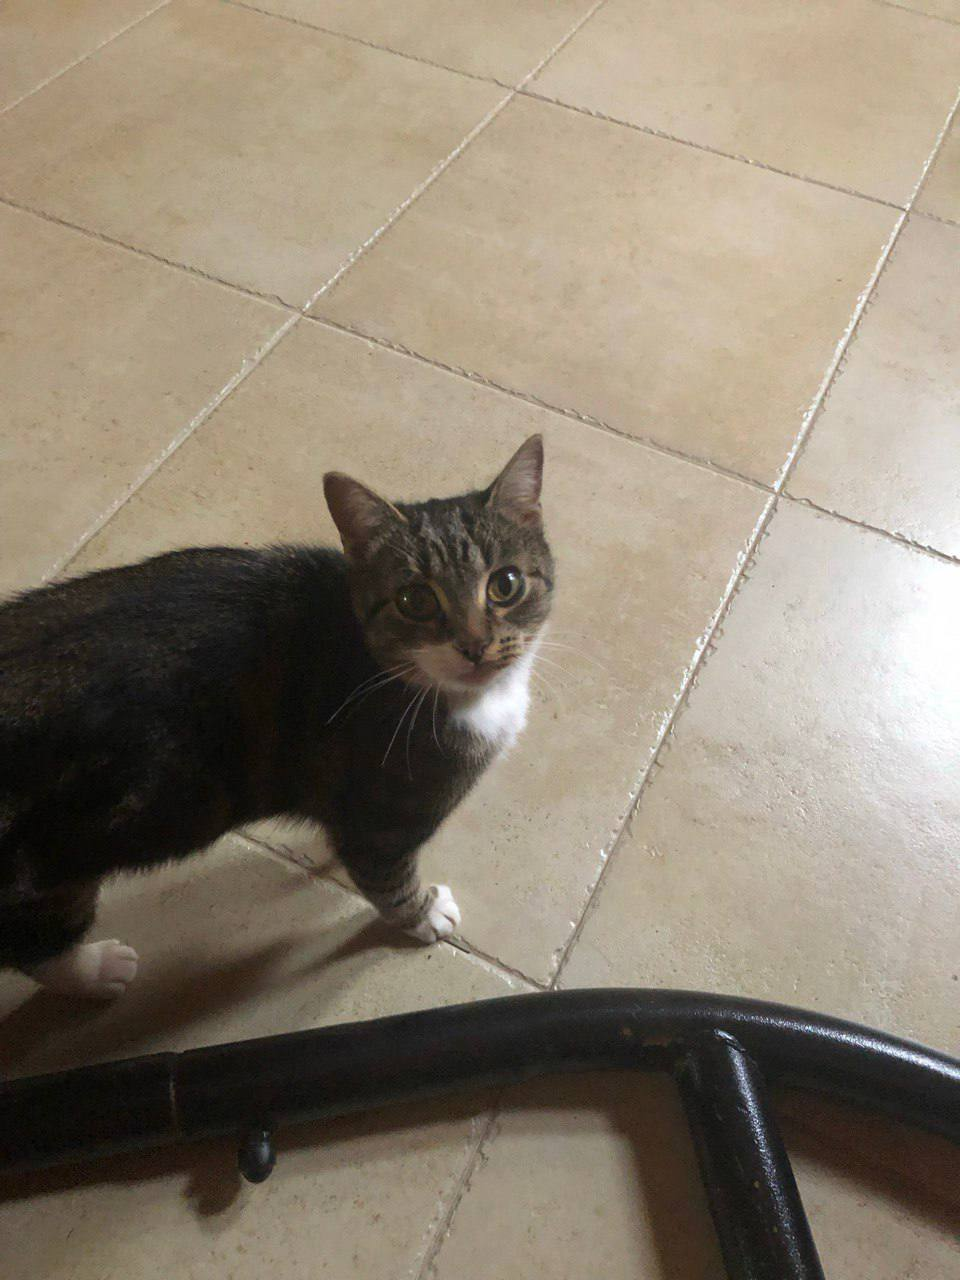